# Data Analysis Pipeline - Interactive Notebook

This notebook version of the main pipeline allows for interactive execution and inline plot display. Perfect for development, debugging, and reviewing visualizations.

In [ ]:
# Import required modules
from datetime import datetime
import random
import sys
import os

# Add current directory to path to import modules
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

import modules.utils as utils
from modules.pipeline_manager import PipelineManager

In [ ]:
# Configure matplotlib for notebook inline display
import matplotlib
import matplotlib.pyplot as plt

# Set backend for notebook display
%matplotlib inline
matplotlib.use('module://matplotlib_inline.backend_inline')

# Enable high-resolution plots
%config InlineBackend.figure_format = 'retina'

print("Matplotlib configured for notebook display")

## Configuration Section

Modify these settings for different runs. This section replaces the configuration from the original main.py file.

In [ ]:
# === CONFIGURATION SECTION ===
# Easy to modify for different runs

# Generate run ID
current_datetime = datetime.now()
formatted_date = current_datetime.strftime('%Y%m%d')
random_4_digit_str = f"{random.randint(0, 9999):04d}"
run_id = f"{formatted_date}_{random_4_digit_str}"

# Subject Selection Options (uncomment one):
# Option 1: Specify subjects directly
subject_selection = "LCHR_MC01,LCHR_MC02"  # Comma-separated list
# subject_selection = "LCHR_MC01"  # Single subject

# Option 2: Use predefined groups (uncomment to use)
# subject_selection = "lchr_subjects"        # From subject_groups in YAML
# subject_selection = "all_2AFC"             # From subject_groups in YAML

# Option 3: Use all subjects from an experiment (uncomment to use)
# subject_selection = "session_config_list_2AFC"  # All subjects in this experiment

# Option 4: Use None to get all subjects for the experiment (uncomment to use)
# subject_selection = None

# Experiment configuration to use
experiment_config = "single_interval_discrimination"

# Pipeline control flags - set to True to skip steps
skip_extraction = False
skip_preprocessing = False
skip_loading = False  
skip_analysis = False
skip_visualization = False

# Force flags - set to True to force re-processing
force_extraction = False
force_preprocessing = False

print(f"Pipeline run ID: {run_id}")
print(f"Subject selection: {subject_selection}")
print(f"Experiment config: {experiment_config}")

## Pipeline Initialization

Initialize the pipeline manager and setup logging.

In [ ]:
# Setup logging for entire application
logger = utils.setup_logging(run_id)
logger.info("Notebook: === Data Analysis Pipeline Started ===")

# Initialize pipeline with config, experiment, and optional subjects
pipeline = PipelineManager(
    config_path='modules/config.yaml',
    experiment_config=experiment_config,
    subject_selection=subject_selection,
    run_id=run_id
)

# Show pipeline configuration
print(f"Config loaded from: {pipeline.config_manager.config_path}")
print(f"Available experiments: {list(pipeline.config.get('experiment_configs', {}).keys())}")
print(f"Available subjects: {list(pipeline.config.get('subjects', {}).keys())}")

# Get final subject list
subject_list = pipeline.get_subject_list()
print(f"Final subject list: {subject_list}")

## Step 1: Session Extraction

Extract raw session data from source files.

In [ ]:
# Run session extraction if not skipped
if not skip_extraction:
    logger.info("Notebook: Starting session extraction pipeline step...")
    try:
        pipeline.initialize_session_extractor(force=force_extraction)
        pipeline.extract_sessions(force=force_extraction)
        logger.info("Notebook: Session extraction pipeline step completed")
        print("✓ Session extraction completed successfully")
    except Exception as e:
        logger.error(f"Notebook: Session extraction pipeline step failed: {str(e)}")
        print(f"✗ Session extraction failed: {str(e)}")
else:
    logger.info("Notebook: Skipping session extraction")
    print("→ Skipping session extraction")

## Step 2: Session Preprocessing

Preprocess and clean the extracted session data.

In [ ]:
# Run session preprocessing if not skipped
if not skip_preprocessing:
    logger.info("Notebook: Starting session preprocessing pipeline step...")
    try:
        pipeline.initialize_session_preprocessor(force=force_preprocessing)
        pipeline.preprocess_sessions(force=force_preprocessing)
        logger.info("Notebook: Session preprocessing pipeline step completed")
        print("✓ Session preprocessing completed successfully")
    except Exception as e:
        logger.error(f"Notebook: Session preprocessing pipeline step failed: {str(e)}")
        print(f"✗ Session preprocessing failed: {str(e)}")
else:
    logger.info("Notebook: Skipping session preprocessing")
    print("→ Skipping session preprocessing")

## Step 3: Data Loading

Load preprocessed data into memory for analysis.

In [ ]:
# Load preprocessed data if not skipped
loaded_data = None

if not skip_loading:
    logger.info("Notebook: Starting data loading pipeline step...")
    try:
        pipeline.initialize_data_loader()
        loaded_data = pipeline.load_data()
        logger.info("Notebook: Data loading pipeline step completed")
        
        # Log summary of loaded data
        metadata = loaded_data['metadata']
        logger.info(f"Notebook: Loaded {metadata['total_sessions_loaded']}/{metadata['total_sessions_requested']} sessions from {metadata['subjects_loaded']}/{metadata['subjects_requested']} subjects")
        
        print("✓ Data loading completed successfully")
        print(f"  → Loaded {metadata['total_sessions_loaded']}/{metadata['total_sessions_requested']} sessions")
        print(f"  → From {metadata['subjects_loaded']}/{metadata['subjects_requested']} subjects")
        
    except Exception as e:
        logger.error(f"Notebook: Data loading pipeline step failed: {str(e)}")
        print(f"✗ Data loading failed: {str(e)}")
else:
    logger.info("Notebook: Skipping data loading")
    print("→ Skipping data loading")

## Step 4: Data Analysis

Analyze the loaded data to generate analysis results.

In [ ]:
# Run data analysis if not skipped
analysis_results = None

if not skip_analysis and loaded_data is not None:
    logger.info("Notebook: Starting data analysis pipeline step...")
    try:
        pipeline.initialize_data_analyzer(loaded_data)
        analysis_results = pipeline.analyze_data(loaded_data)
        logger.info("Notebook: Data analysis pipeline step completed")
        
        # Log summary of analysis results
        subjects_analyzed = analysis_results.get('subjects_analyzed', 0)
        logger.info(f"Notebook: Analysis completed for {subjects_analyzed} subjects")
        
        print("✓ Data analysis completed successfully")
        print(f"  → Analysis completed for {subjects_analyzed} subjects")
        
    except Exception as e:
        logger.error(f"Notebook: Data analysis pipeline step failed: {str(e)}")
        print(f"✗ Data analysis failed: {str(e)}")
else:
    if loaded_data is None:
        logger.info("Notebook: Skipping analysis - no data loaded")
        print("→ Skipping analysis - no data loaded")
    else:
        logger.info("Notebook: Skipping data analysis")
        print("→ Skipping data analysis")

## Step 5: Visualization Generation

Generate visualizations from analysis results. Plots will appear inline below.

2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - Notebook: Starting visualization pipeline step...
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Initializing GeneralVisualizer...
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Created output directory for subject LCHR_MC01
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Created output directory for subject LCHR_MC02
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Initializing GeneralVisualizer...
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Created output directory for subject LCHR_MC01
2025-07-26 19:25:18,643 - 20250726_3894 - root - INFO - VZ: Created output directory for subject LCHR_MC02
2025-07-26 19:25:18,652 - 20250726_3894 - root - INFO - VZ: Interactive plotting enabled (development mode)
2025-07-26 19:25:18,652 - 20250726_3894 - root - INFO - VZ: Loading experiment-specific visualizer: SingleIntervalDiscriminationVisualizer from single_interval_discrimina

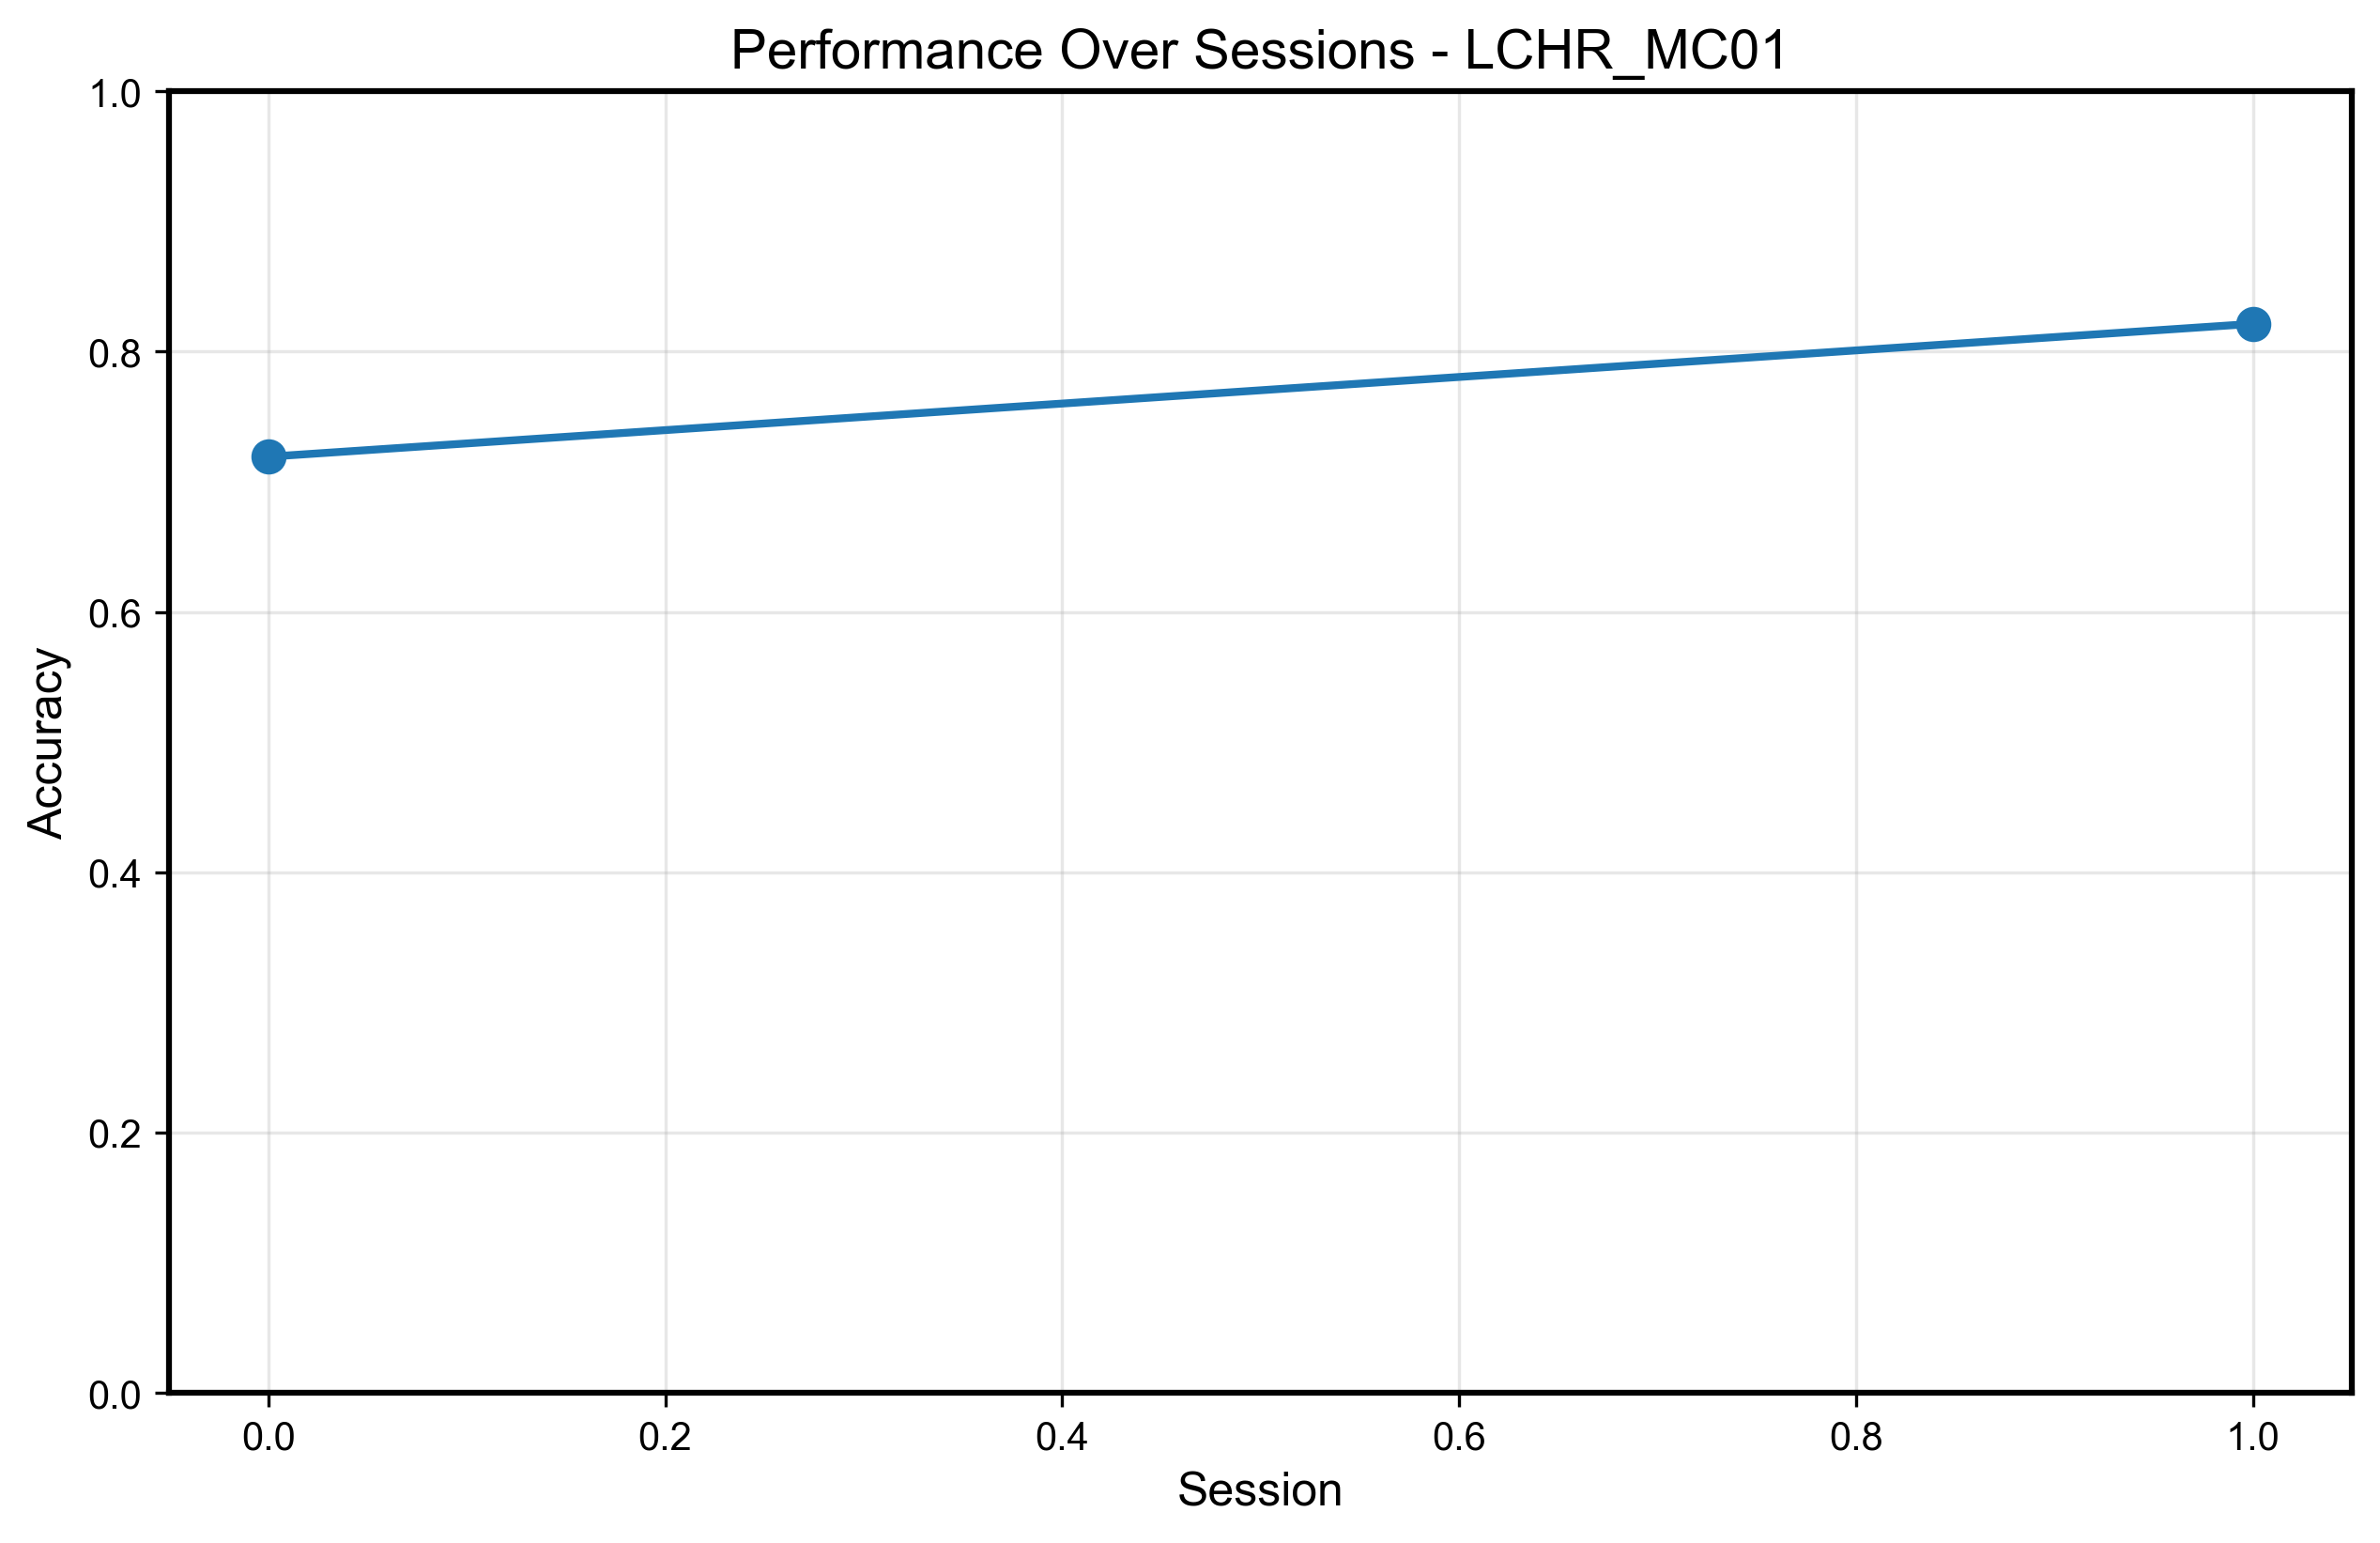

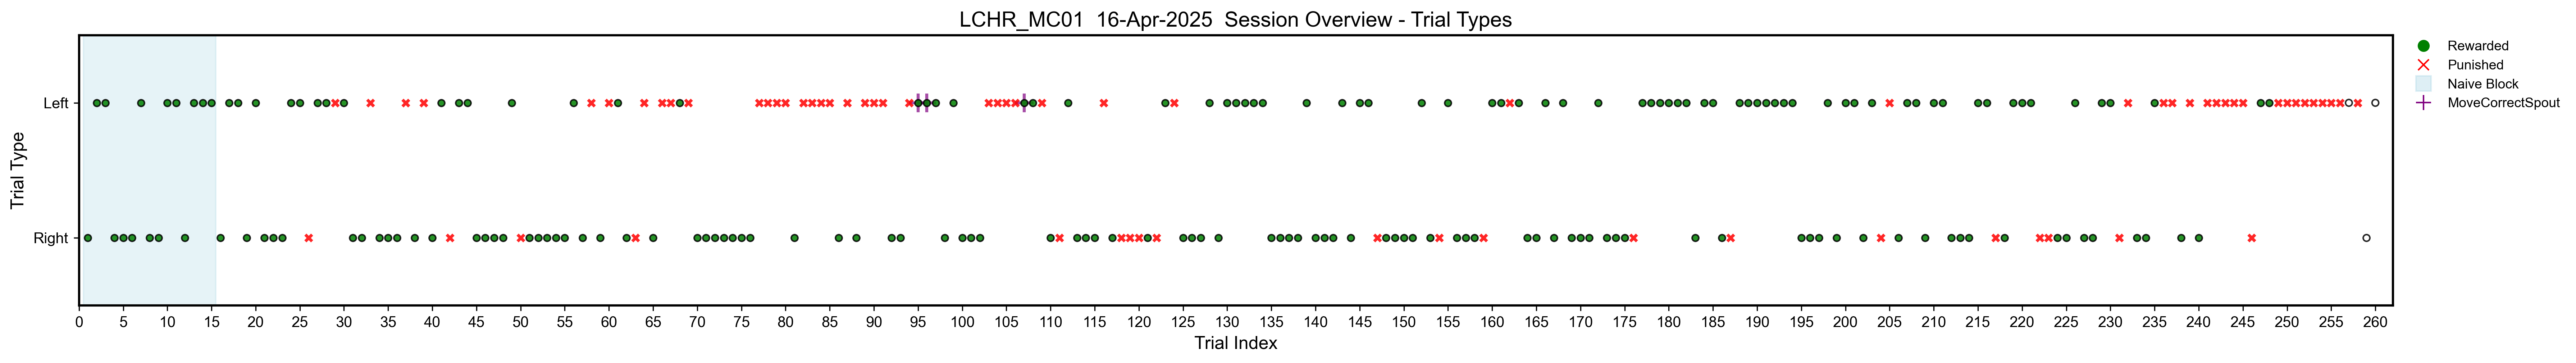

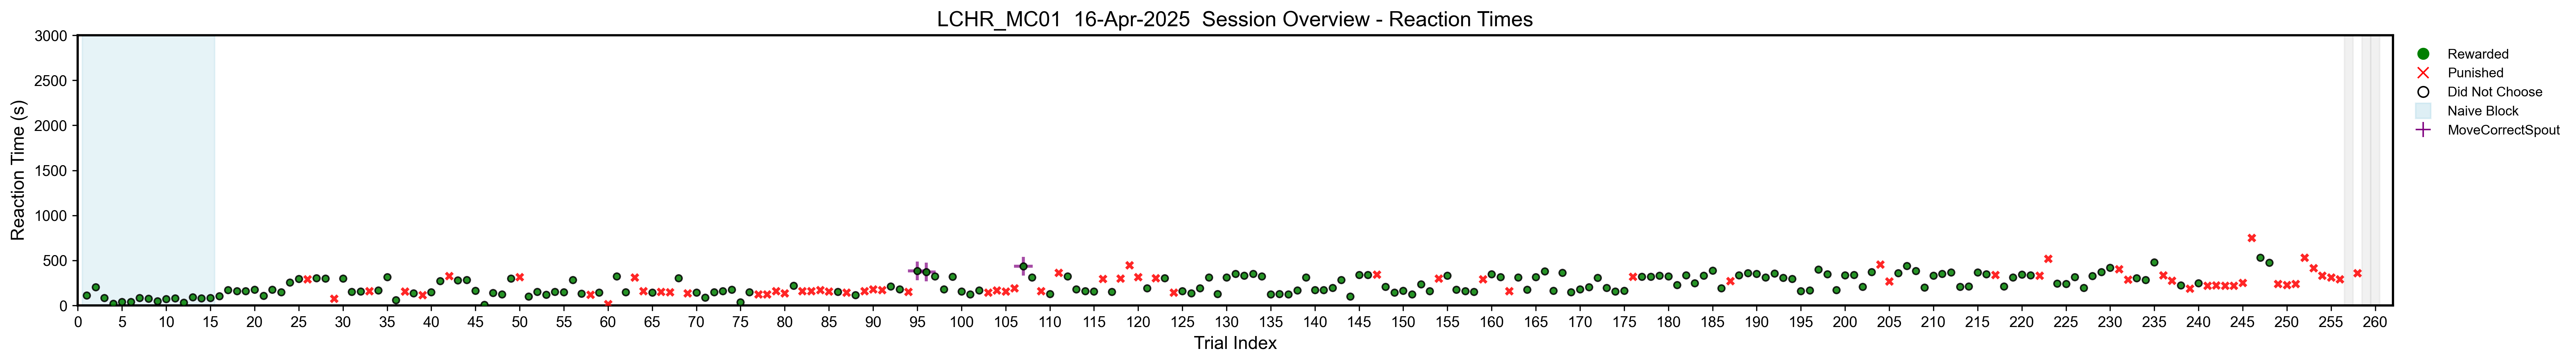

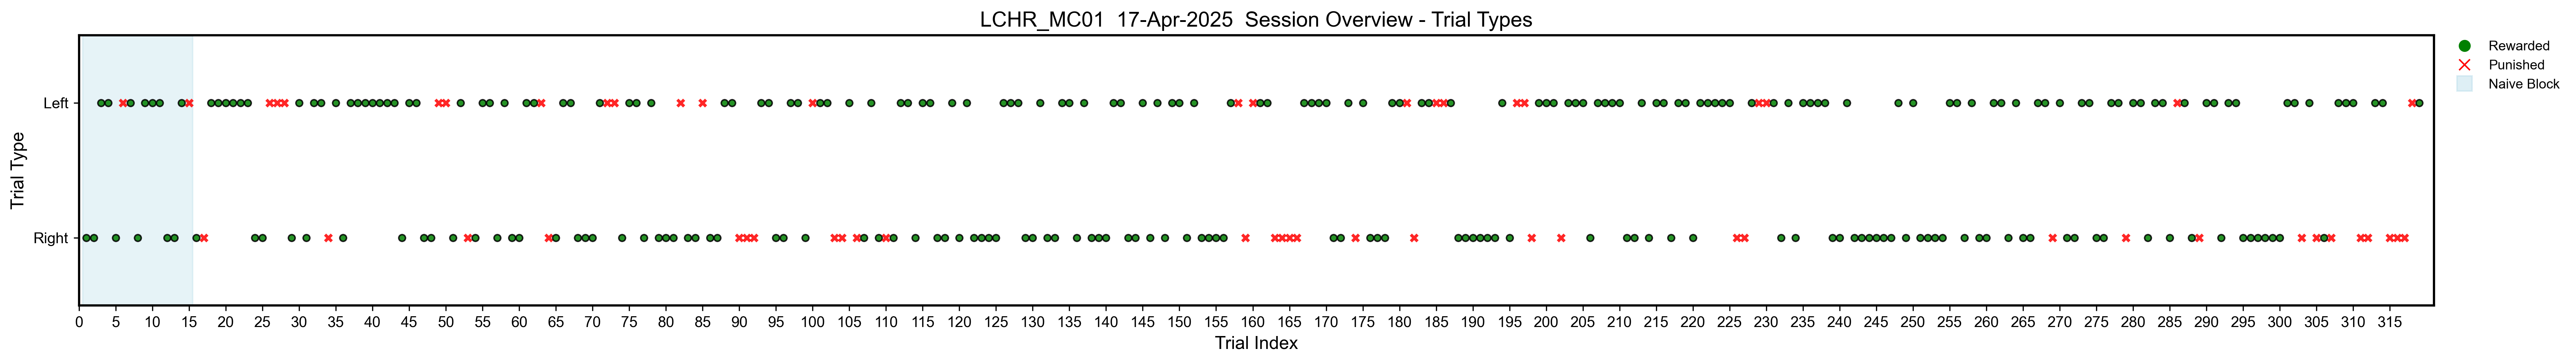

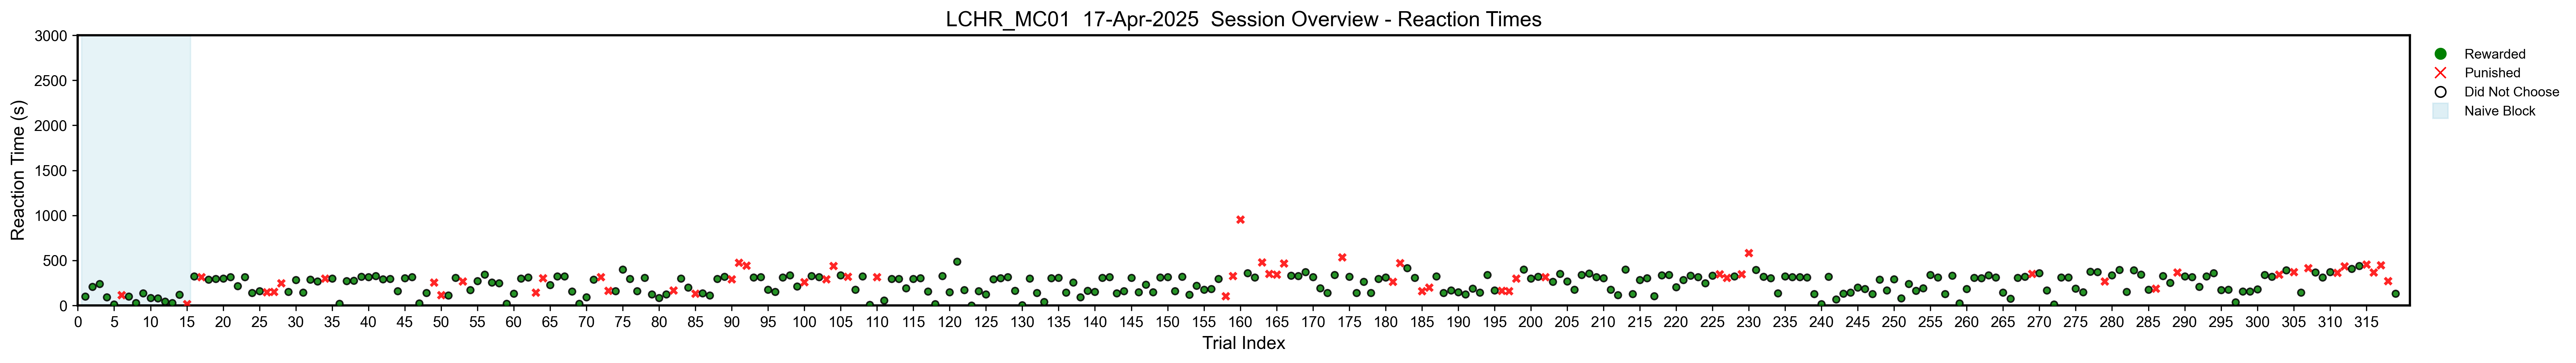

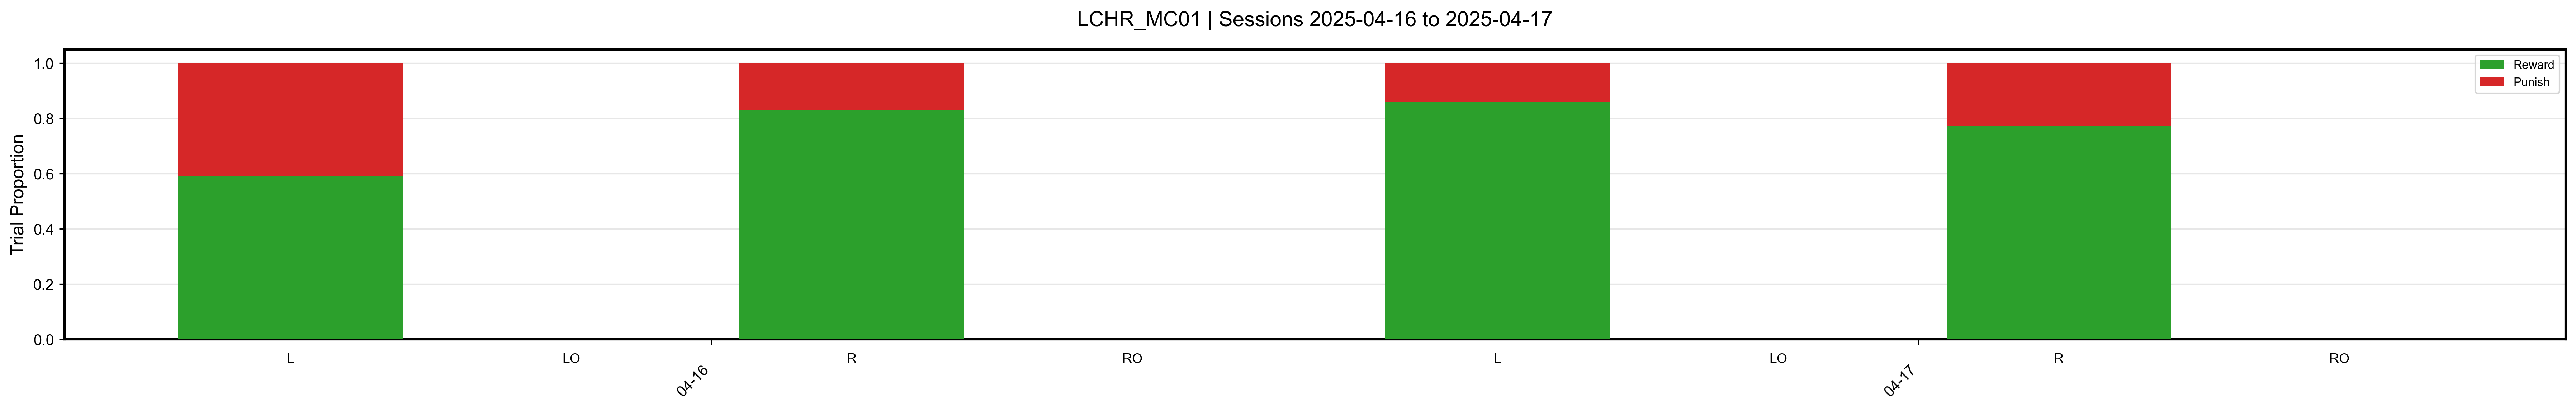

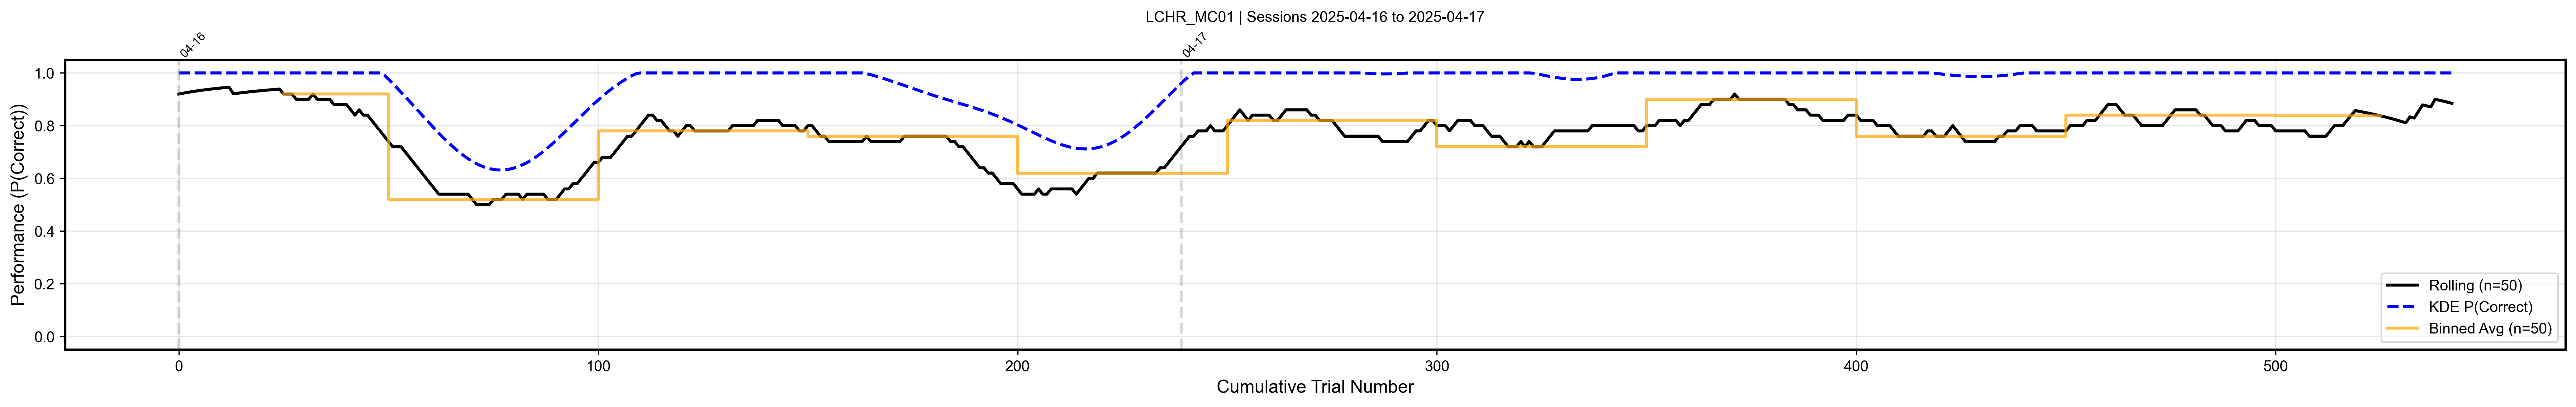

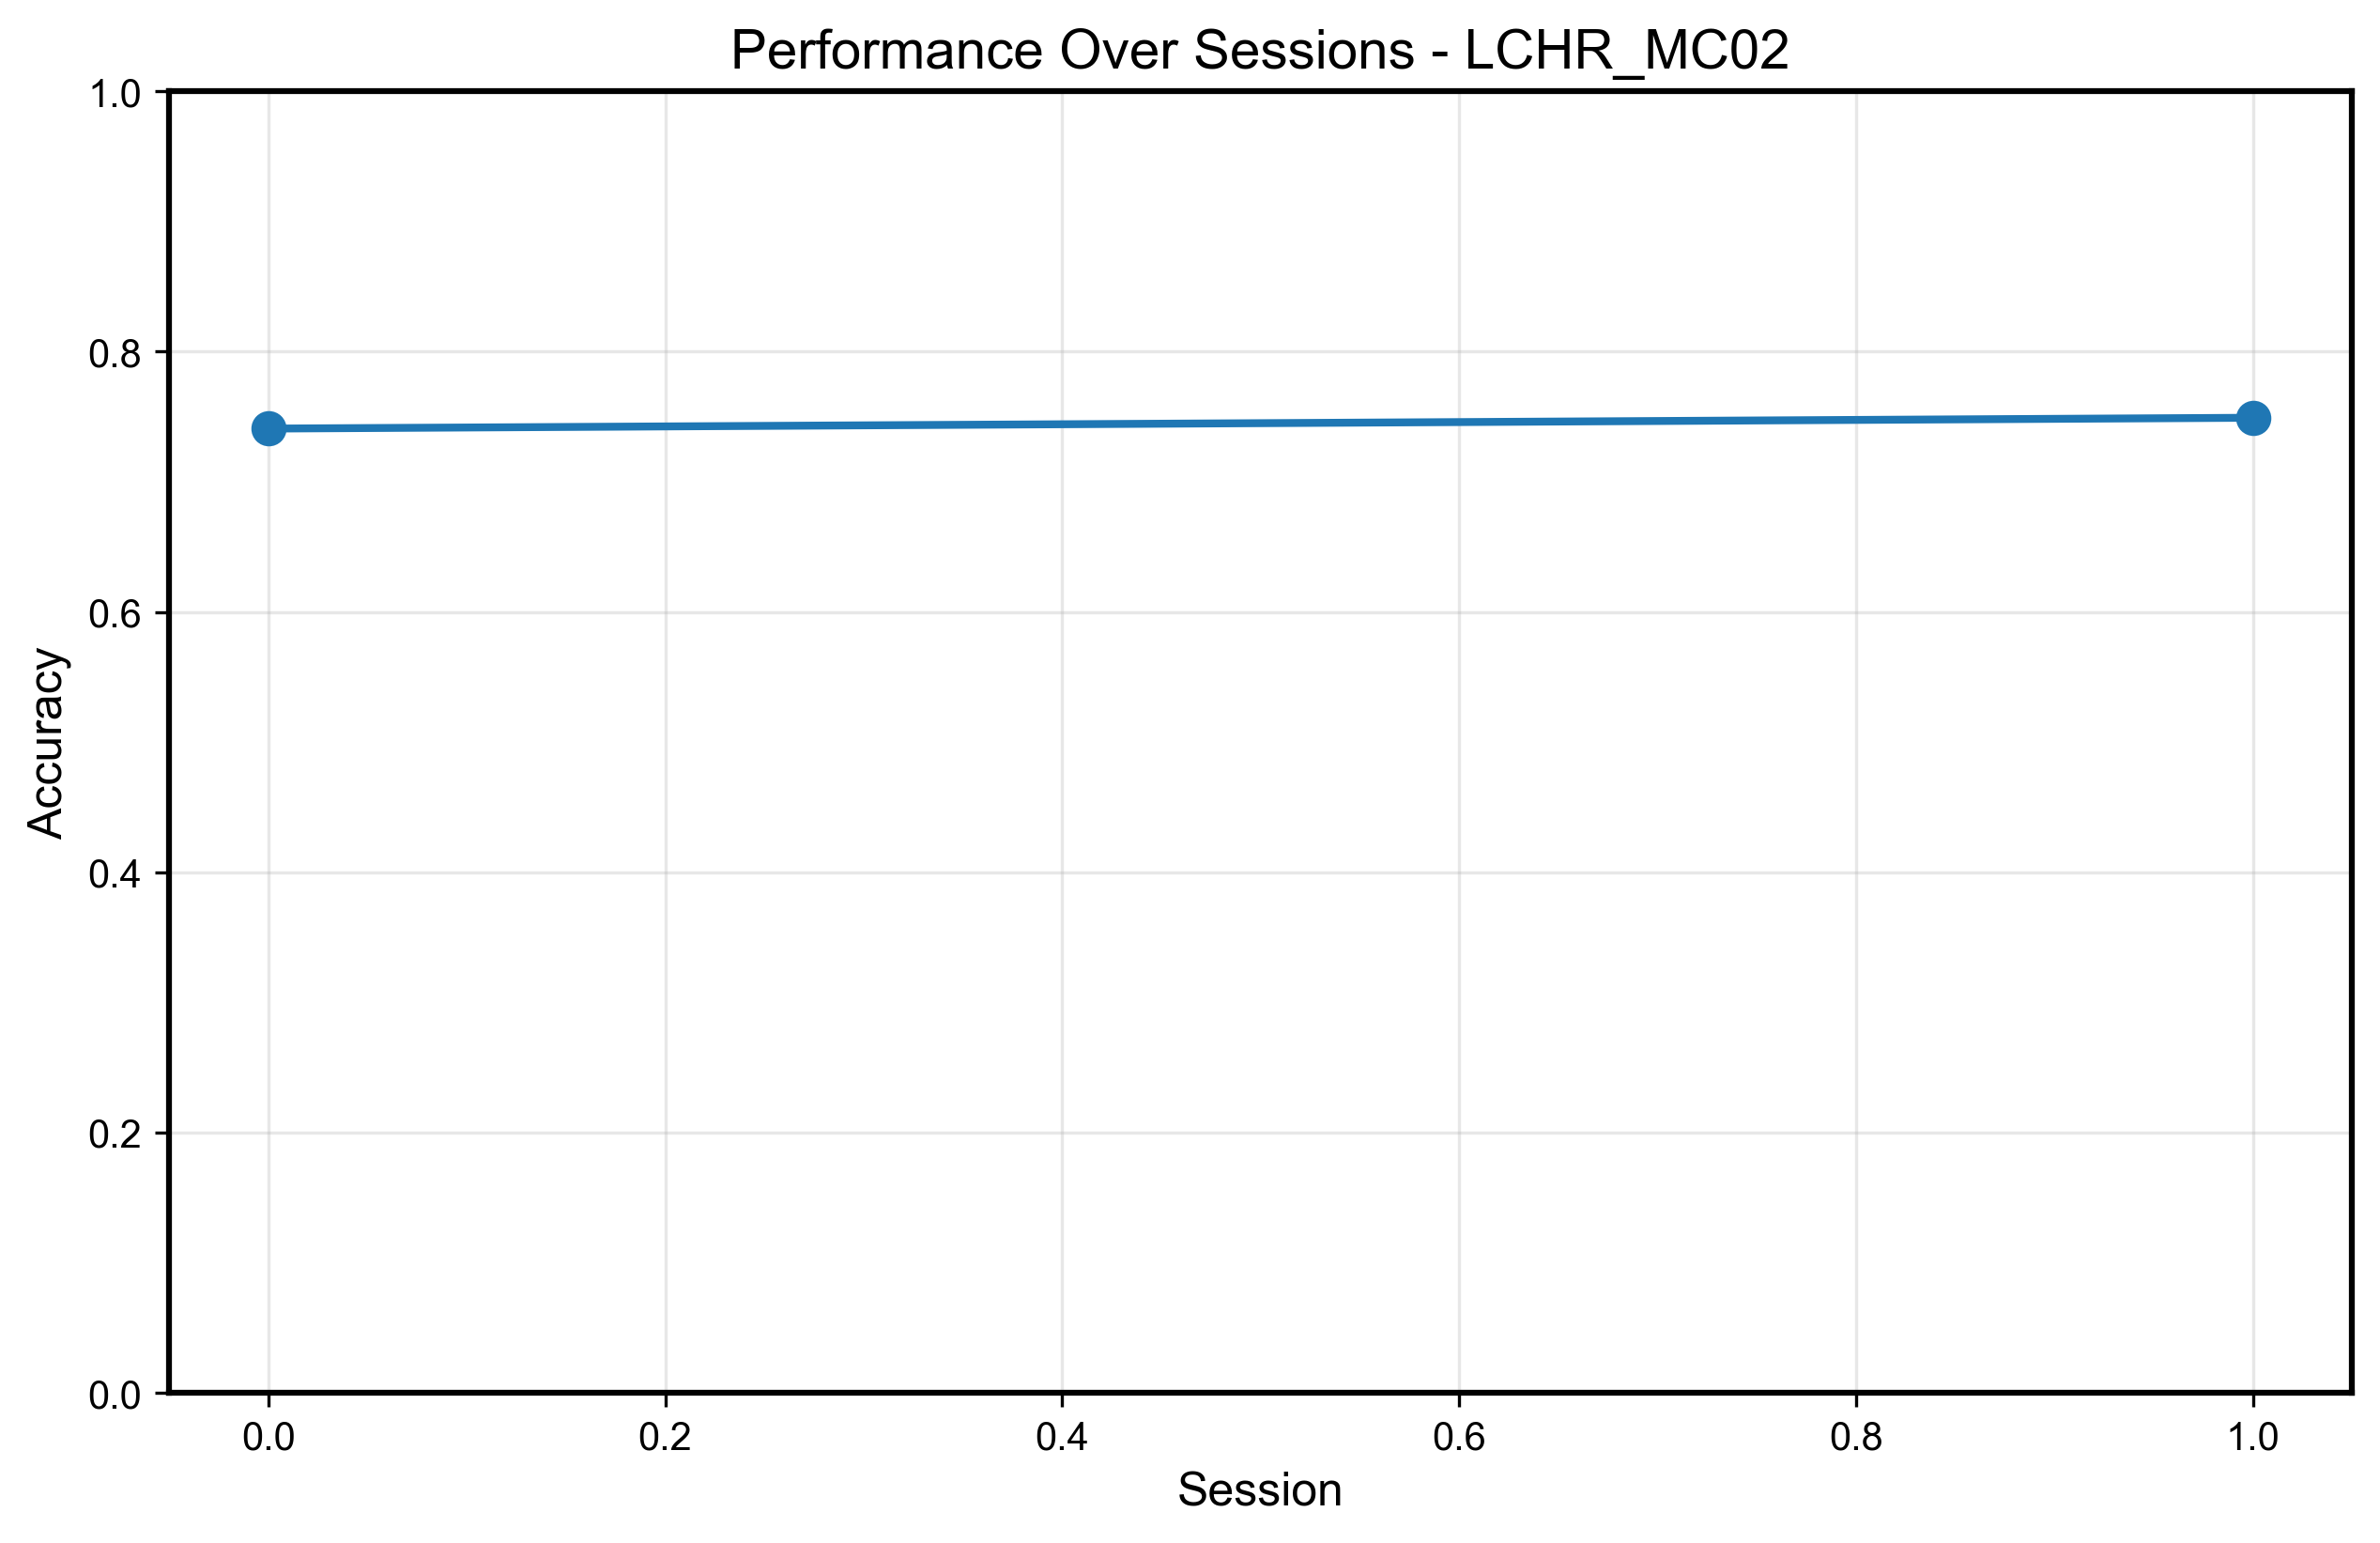

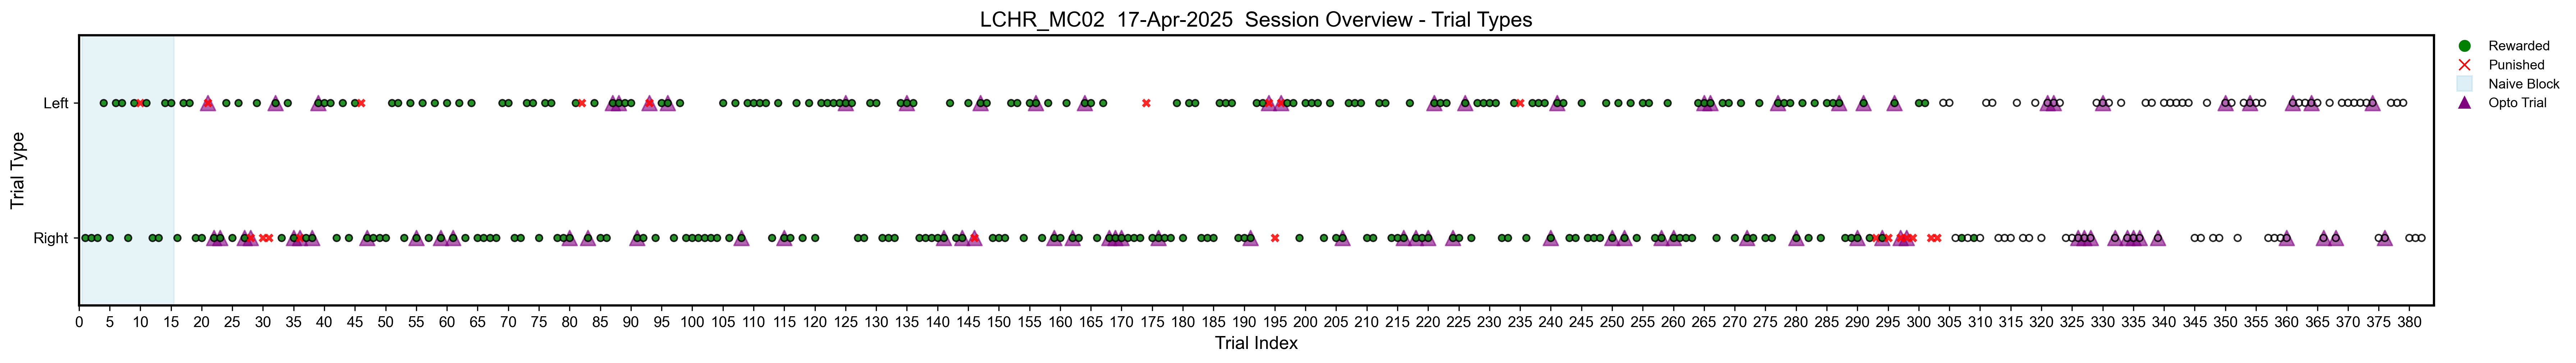

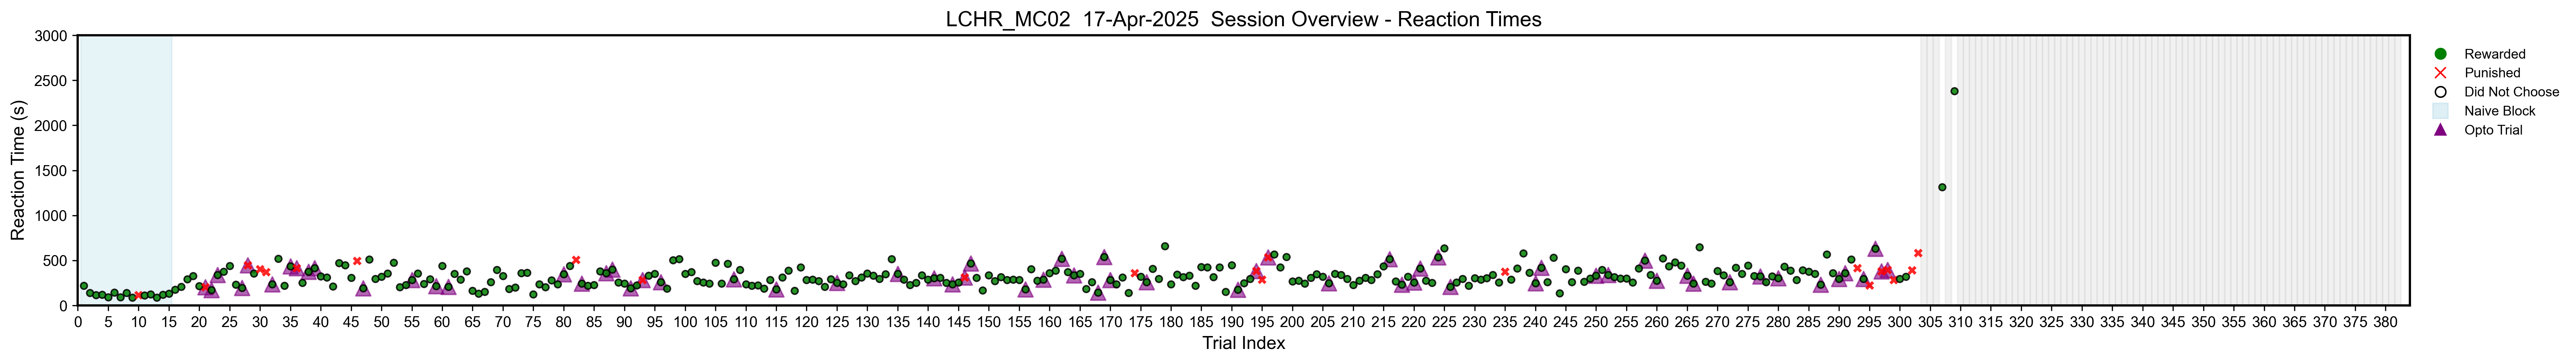

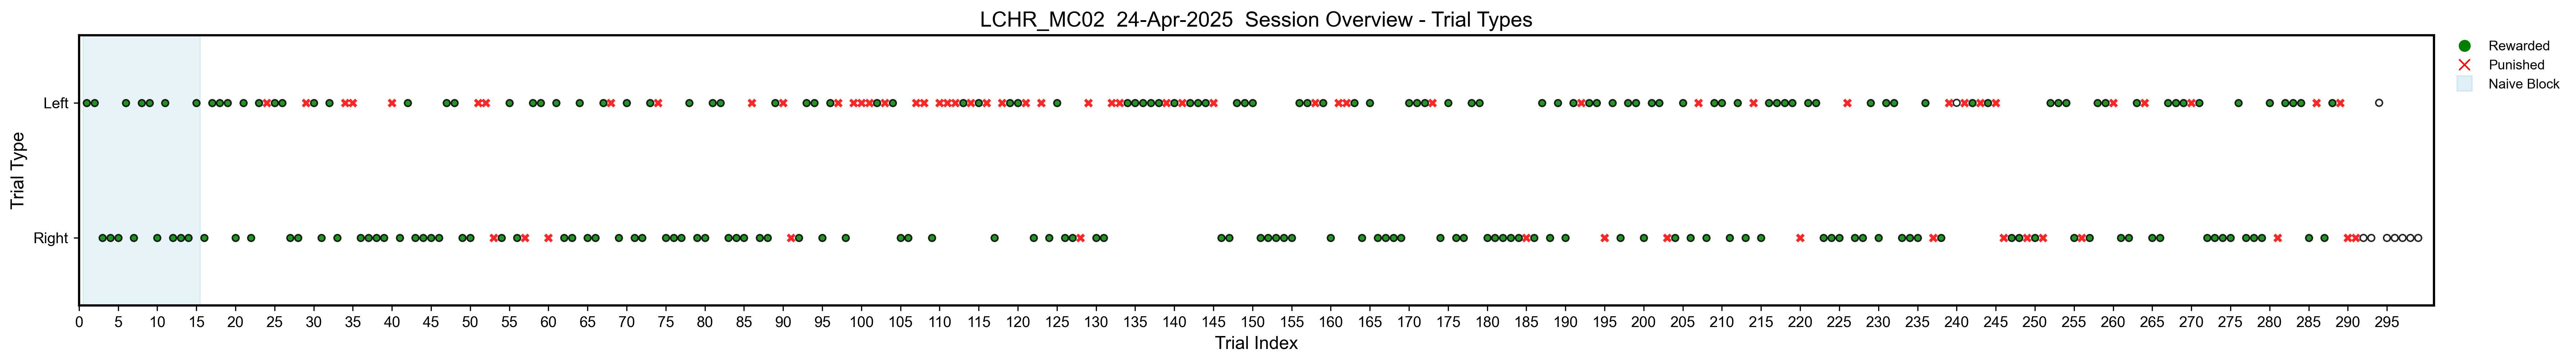

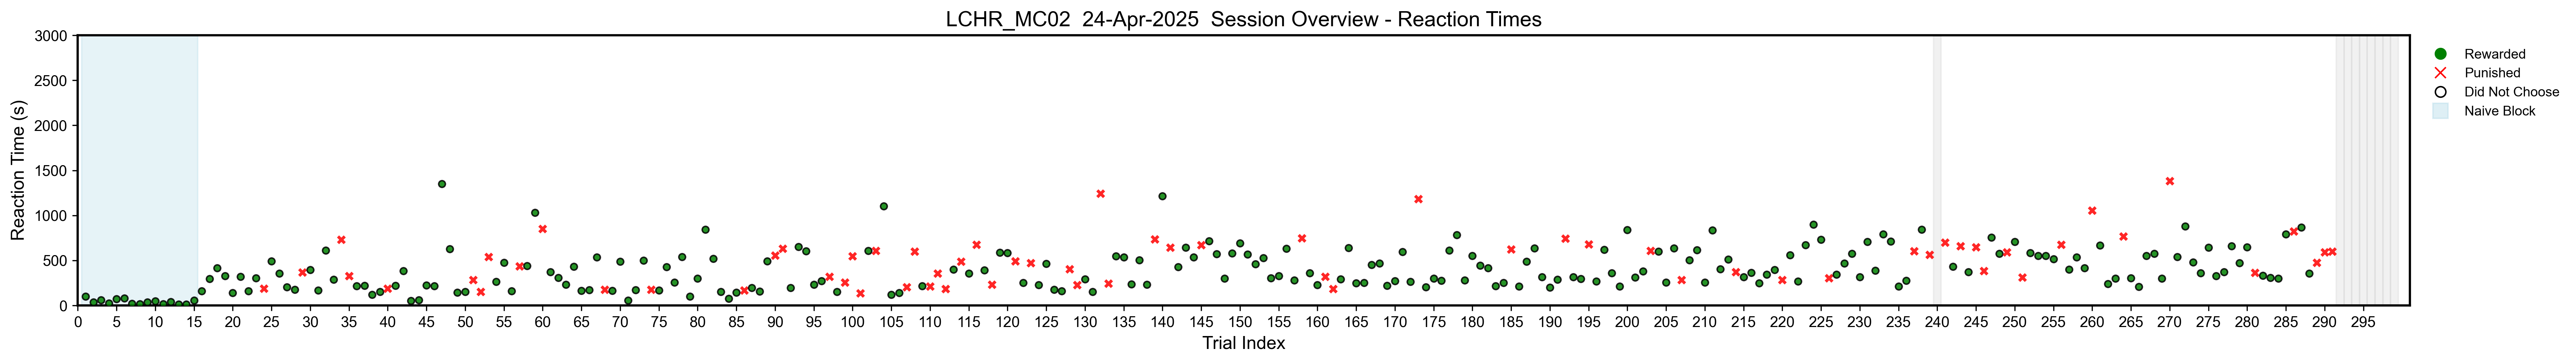

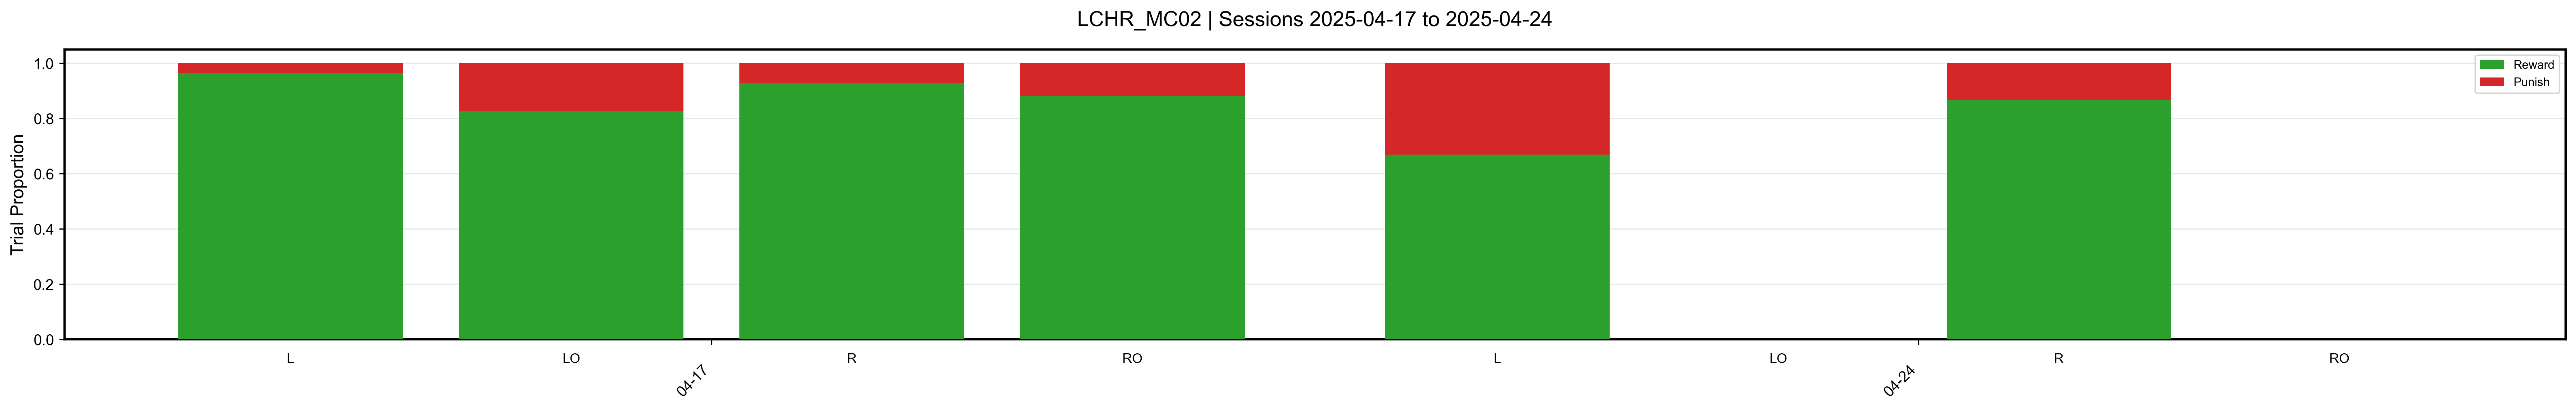

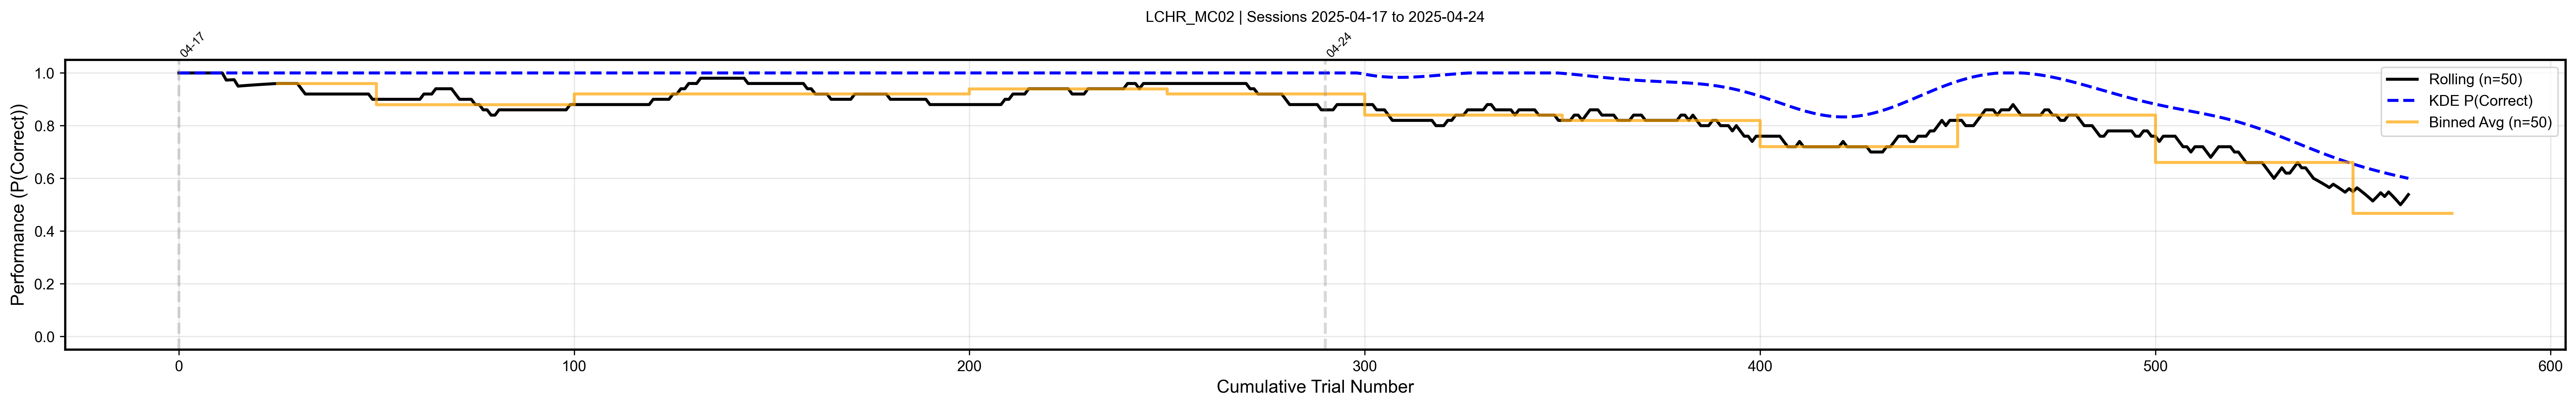

In [27]:
# Generate visualizations if not skipped
visualization_results = None

if not skip_visualization and analysis_results is not None:
    logger.info("Notebook: Starting visualization pipeline step...")
    try:
        pipeline.initialize_visualizer(analysis_results)
        
        # Override backend after visualizer init for notebook display
        import matplotlib
        import matplotlib.pyplot as plt
        %matplotlib inline
        matplotlib.use('module://matplotlib_inline.backend_inline')
        plt.ion()
        
        # Store figures to display only when show_override=True
        figures_to_show = []
        
        # Custom show_figure that respects show_override
        def notebook_show_figure(fig, show_override=None):
            should_show = show_override if show_override is not None else False
            if should_show:
                figures_to_show.append(fig)
        
        # Monkey patch both plt.close and show_figure
        original_close = plt.close
        original_show_figure = pipeline.visualizer.show_figure
        
        plt.close = lambda *args, **kwargs: None  # Disable plt.close()
        pipeline.visualizer.show_figure = notebook_show_figure
        
        visualization_results = pipeline.generate_visualizations(analysis_results)
        
        # Display only the figures that should be shown
        from IPython.display import display
        for fig in figures_to_show:
            display(fig)
        
        # Restore original functions
        plt.close = original_close
        pipeline.visualizer.show_figure = original_show_figure
        
        logger.info("Notebook: Visualization pipeline step completed")
        
        # Log summary of visualization results
        figures_generated = visualization_results.get('figures_generated', 0)
        logger.info(f"Notebook: Generated {figures_generated} figures")
        
        print("✓ Visualization generation completed successfully")
        print(f"  → Generated {figures_generated} figures")
        print(f"  → Check output directories for saved figures")
        
    except Exception as e:
        logger.error(f"Notebook: Visualization pipeline step failed: {str(e)}")
        print(f"✗ Visualization generation failed: {str(e)}")
        # Restore plt.close even if there's an error
        plt.close = original_close
else:
    if analysis_results is None:
        logger.info("Notebook: Skipping visualization - no analysis results")
        print("→ Skipping visualization - no analysis results")
    else:
        logger.info("Notebook: Skipping visualization")
        print("→ Skipping visualization")

## Pipeline Summary

Summary of the completed pipeline execution.

In [ ]:
# Pipeline completion summary
print("\n" + "="*50)
print("PIPELINE EXECUTION SUMMARY")
print("="*50)

print(f"Run ID: {run_id}")
print(f"Subjects processed: {subject_list}")
print(f"Experiment config: {experiment_config}")

steps_completed = []
if not skip_extraction:
    steps_completed.append("Session Extraction")
if not skip_preprocessing:
    steps_completed.append("Session Preprocessing") 
if not skip_loading and loaded_data is not None:
    steps_completed.append("Data Loading")
if not skip_analysis and analysis_results is not None:
    steps_completed.append("Data Analysis")
if not skip_visualization and visualization_results is not None:
    steps_completed.append("Visualization Generation")

print(f"Steps completed: {', '.join(steps_completed)}")

if visualization_results:
    print(f"Figures generated: {visualization_results.get('figures_generated', 0)}")
    print("Check 'output/figures/' directory for saved visualizations")

print("="*50)
logger.info("Notebook: === Data Analysis Pipeline Completed ===")